Nama : Zulfikar Irham

NIM : 21/475393/PA/20574

# TUGAS MODUL 5

## JAWAB NO. 1

1. Perbaiki hasil yang diperoleh di atas dengan mengubah nilai $h$ sehingga selain
diperoleh gerak osilasi yang benar juga diperoleh ketelitian yang tinggi yaitu
dengan dibuktikan oleh perolehan nilai $E$ yang ajeg.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Berikut merupakan fungsi metode euler yang mereturn dataframe

In [2]:
def metode_euler(n,t0,ta,v0,x0,k,m):
    dt=(ta-t0)/n   # menghitung interval waktu dt atau h
    xi_l = np.zeros(n+1)
    ti_l = np.zeros(n+1)
    vi_l = np.zeros(n+1)
    Fi_l = np.zeros(n+1)
    En_total_l = np.zeros(n+1)
    xi_l[0] = x0
    vi_l[0] = v0
    Fi_l[0] = -k*xi_l[0]/m 
    En_total_l[0]=(m/2)*(vi_l[0])**2 + (k/2)*(xi_l[0])**2
    x0 = xi_l[0]
    v0 = vi_l[0]
    En_total0=En_total_l[0]
    fv=-k*x0/m
    fx=v0
    for i in range(1,(n+1)):   
        ti=i*dt
        vi=v0+dt*fv
        xi=x0+dt*fx
        En_total=(m/2)*vi**2 + (k/2)*xi**2
        #print("%2.3f  %4.3f  %4.3f  %4.3f"% (ti,xi,vi,En_total))
    
        ti_l[i]=ti
        vi_l[i]=vi
        xi_l[i]=xi
        En_total_l[i]=En_total
    
        v0=vi
        x0=xi
        fv=-k*x0/m
        fx=v0
  
    df = pd.DataFrame({
      "ti" : ti_l,
      "xi" : xi_l,
      "vi" : vi_l,
      "En_total" : En_total_l
     })
    return df

Membuat fungsi untuk memplot grafik

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
def plot_grafik(df1,df2,title):
    fig, axs = plt.subplots(1,2,figsize=(12,6))
    axs[0].plot(df1["ti"],df1["vi"],'o')
    axs[0].plot(df1["ti"],df1["xi"],'-')
    axs[0].plot(df1["ti"],df1["En_total"])
    axs[0].plot(df1["ti"],np.zeros(len(df1["ti"])))
    axs[0].set_title("Grafik dengan data semula tanpa perubahan")
    axs[0].set_xlabel(" Waktu t")
    axs[0].set_ylabel(" v(t), x(t), Energi Total")
    axs[0].legend(["v(t)","x(t)","Energi Total"],loc='best')
    #axs[0].axhline(y=0, color='k')
    axs[1].plot(df2["ti"],df2["vi"],'o')
    axs[1].plot(df2["ti"],df2["xi"],'-')
    axs[1].plot(df2["ti"],df2["En_total"])
    axs[1].plot(df2["ti"],np.zeros(len(df2["ti"])))
    axs[1].set_title(title)
    axs[1].set_xlabel(" Waktu t")
    axs[1].set_ylabel(" v(t), x(t), Energi Total")
    axs[1].legend(["v(t)","x(t)","Energi Total"],loc='best')

In [4]:
#Data tanpa perubahan h
df=metode_euler(n=50,t0=0,ta=5,v0=2, x0=0,k=1,m=1)
df.head()

,ti,xi,vi,En_total
0,0.0,0.000,2.0000,2.000000
1,0.1,0.200,2.0000,2.020000
2,0.2,0.400,1.9800,2.040200
3,0.3,0.598,1.9400,2.060602
4,0.4,0.792,1.8802,2.081208


Dapat dilihat dari tabel di atas nilai $E$ tidak ajeg, maka supaya ajeg dapat diubah nilai $h$ menjadi lebih kecil dengan cara memperbesar $n$

In [5]:
df_n100k=metode_euler(n=1_00_000,t0=0,ta=5,v0=2,x0=0,k=1,m=1)
df_n100k

,ti,xi,vi,En_total
0,0.00000,0.000000,2.000000,2.0000
1,0.00005,0.000100,2.000000,2.0000
2,0.00010,0.000200,2.000000,2.0000
3,0.00015,0.000300,2.000000,2.0000
4,0.00020,0.000400,2.000000,2.0000
...,...,...,...,...
99996,4.99980,-1.918202,0.567012,2.0005
99997,4.99985,-1.918173,0.567108,2.0005
99998,4.99990,-1.918145,0.567203,2.0005
99999,4.99995,-1.918117,0.567299,2.0005


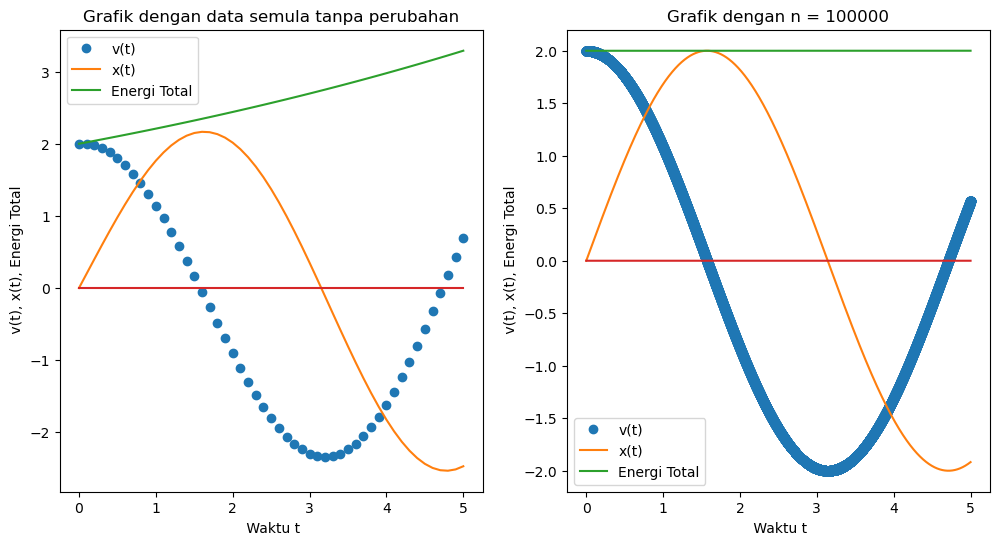

In [6]:
title = "Grafik dengan n = 100000"
plot_grafik(df, df_n100k,title)

Dapat dilihat grafik di atas dengan $n = 100000$ menunjukkan kurva $E$ dengan nilai konstan di angka 2

## Jawab No.2

 Analisis perubahan nilai masukan $m$, $k$, $v_{0}$, $x_{0}$, serta $h$ terhadap hasil akhir.

 * Merubah besar $k$ menjadi 4

In [7]:
df_k4=metode_euler(n=100_000,t0=0,ta=5,v0=2,x0=0,k=4,m=1)
df_k4

,ti,xi,vi,En_total
0,0.00000,0.000000,2.000000,2.000000
1,0.00005,0.000100,2.000000,2.000000
2,0.00010,0.000200,2.000000,2.000000
3,0.00015,0.000300,2.000000,2.000000
4,0.00020,0.000400,2.000000,2.000000
...,...,...,...,...
99996,4.99980,-0.543957,-1.679418,2.002001
99997,4.99985,-0.544041,-1.679309,2.002001
99998,4.99990,-0.544125,-1.679200,2.002001
99999,4.99995,-0.544209,-1.679091,2.002001


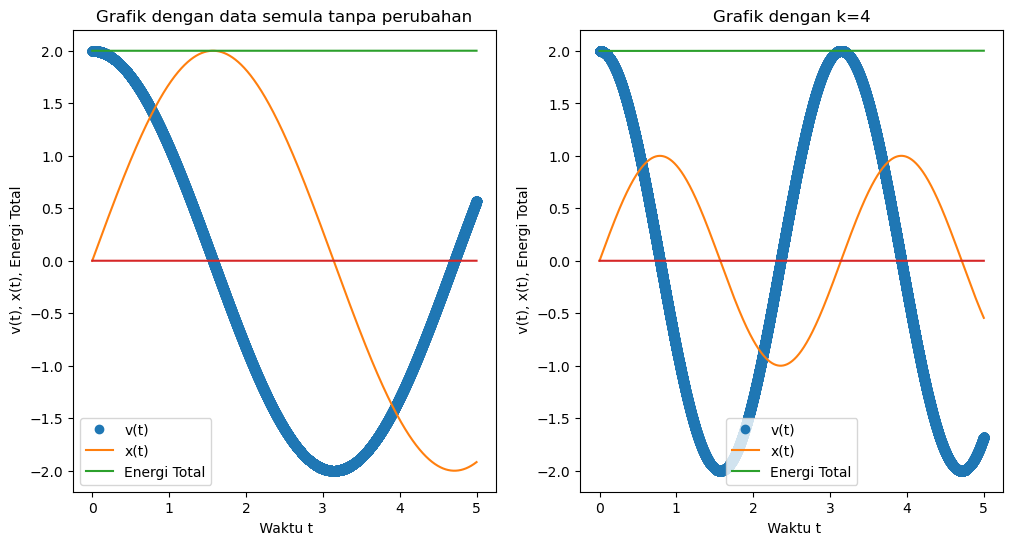

In [8]:
title = "Grafik dengan k=4"
plot_grafik(df_n100k,df_k4,title)

Dengan merubah k menjadi 4, maka dapat dilihat pada grafik terjadi perubahan periode. Periodenya semakin cepat dan juga pada kurva $x(t)$ terjadi penurunan amplitudo setengahnya dari kondisi awal

* Merubah besar $m$ menjadi 4

In [9]:
df_m4 = metode_euler(n=100_000,t0=0,ta=5,v0=2,x0=0,k=1,m=4)
df_m4

,ti,xi,vi,En_total
0,0.00000,0.000000,2.000000,8.0000
1,0.00005,0.000100,2.000000,8.0000
2,0.00010,0.000200,2.000000,8.0000
3,0.00015,0.000300,2.000000,8.0000
4,0.00020,0.000400,2.000000,8.0000
...,...,...,...,...
99996,4.99980,2.394284,-1.602218,8.0005
99997,4.99985,2.394204,-1.602248,8.0005
99998,4.99990,2.394124,-1.602277,8.0005
99999,4.99995,2.394044,-1.602307,8.0005


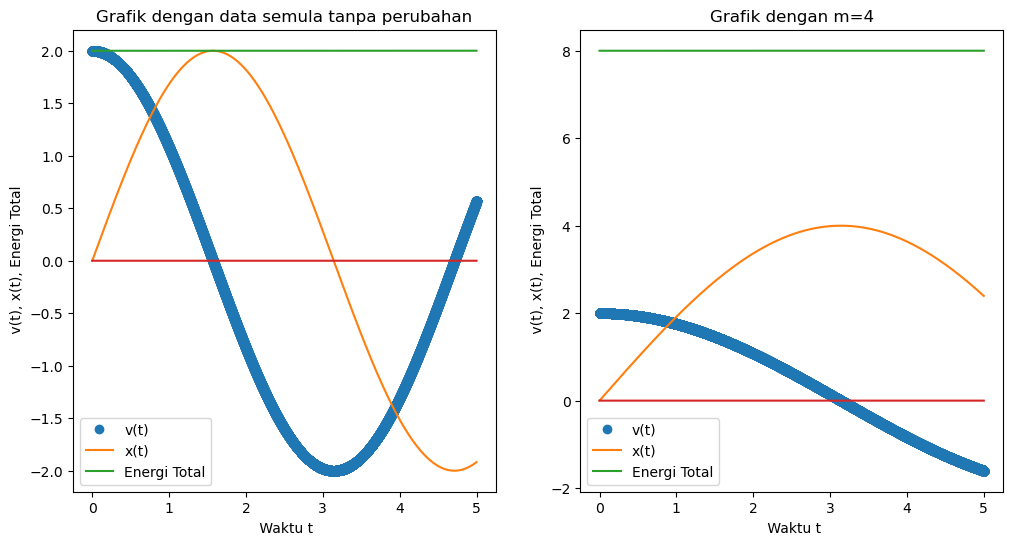

In [10]:
title = "Grafik dengan m=4"
plot_grafik(df_n100k,df_m4,title)

Dapat dilihat pada grafik besar Energi total bertambah 4 kali lipat, besar amplitudo pada kurva $v(t)$ tetap, besar amplitudo pada kurva $x(t)$ bertambah 2 kali lipat, dan periodenya jadi semakin lama.

* Merubah besar v0 menjadi 4

In [11]:
df_vo4=metode_euler(n=100_000,t0=0,ta=5,v0=4,x0=0,k=1,m=1)
df_vo4

,ti,xi,vi,En_total
0,0.00000,0.000000,4.000000,8.000
1,0.00005,0.000200,4.000000,8.000
2,0.00010,0.000400,4.000000,8.000
3,0.00015,0.000600,4.000000,8.000
4,0.00020,0.000800,4.000000,8.000
...,...,...,...,...
99996,4.99980,-3.836403,1.134023,8.002
99997,4.99985,-3.836347,1.134215,8.002
99998,4.99990,-3.836290,1.134407,8.002
99999,4.99995,-3.836233,1.134599,8.002


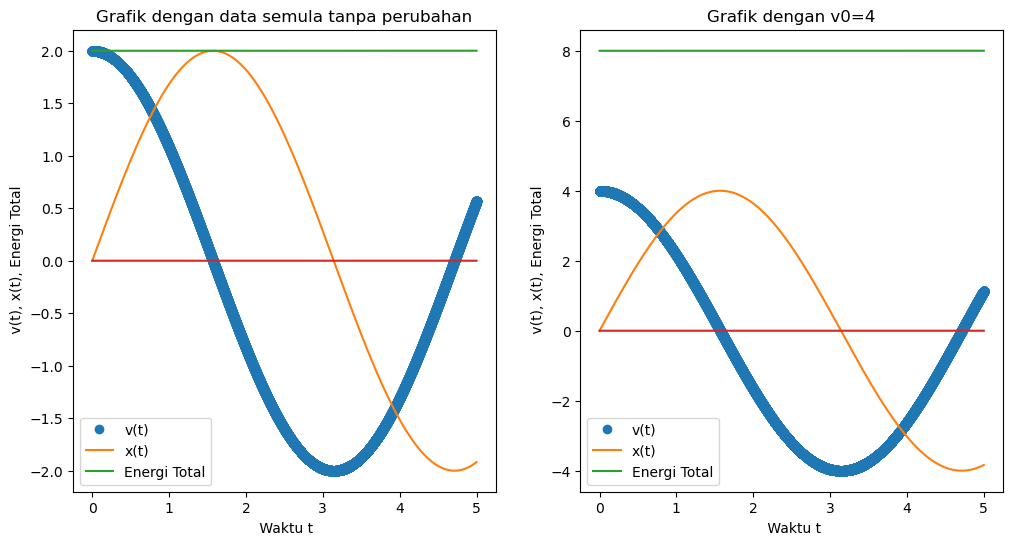

In [12]:
title = "Grafik dengan v0=4"
plot_grafik(df_n100k,df_vo4,title)

Dapat dilihat pada grafik besar dari energi total menjadi 4 kali lipat, besar amplitudo dari kedua kurva $v(t)$ dan $x(t)$ menjadi lebih besar 2 kali lipat dan periodenya tetap

* Merubah besar $x_0$ menjadi 4

In [13]:
df_xo4=metode_euler(n=100_000,t0=0,ta=5,v0=2,x0=4,k=1,m=1)
df_xo4

,ti,xi,vi,En_total
0,0.00000,4.000000,2.000000,10.0000
1,0.00005,4.000100,1.999800,10.0000
2,0.00010,4.000200,1.999600,10.0000
3,0.00015,4.000300,1.999400,10.0000
4,0.00020,4.000400,1.999200,10.0000
...,...,...,...,...
99996,4.99980,-0.784178,4.403415,10.0025
99997,4.99985,-0.783958,4.403454,10.0025
99998,4.99990,-0.783738,4.403494,10.0025
99999,4.99995,-0.783518,4.403533,10.0025


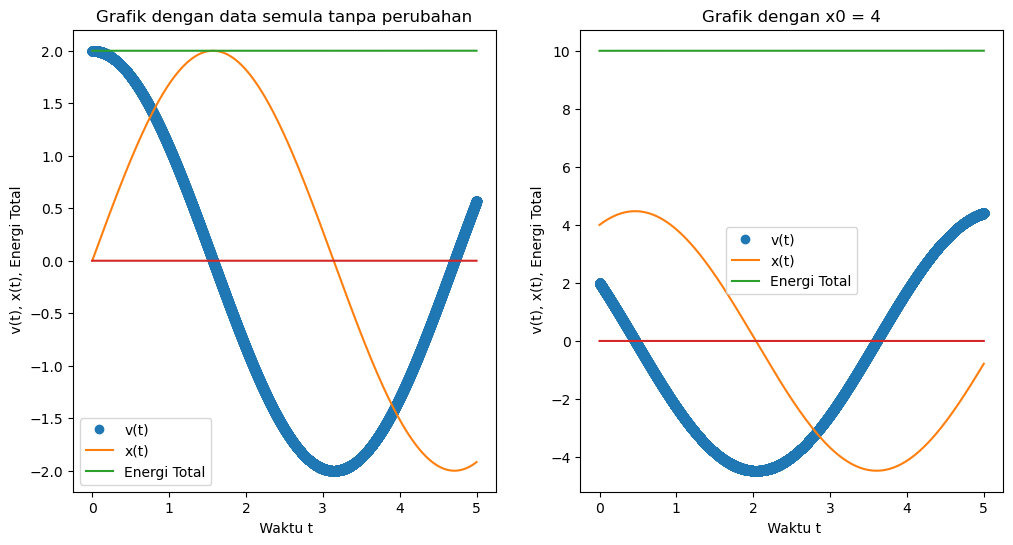

In [14]:
title = "Grafik dengan x0 = 4"
plot_grafik(df_n100k, df_xo4,title)

Dapat dilihat pada grafik dengan mengubah nilai x0 menjadi 4 maka besar amplitudo pada kurva $x(t)$ dan $v(t)$ menjadi lebih besar 2 kali lipat, besar energi total menjadi lebih besar 5 kali lipat, periodenya tetap, dan adanya perubahan posisi awal dari kedua kurva menjadi bergeser ke kiri. 

* Merubah besar h dengan cara merubah besar n dan besar ta

In [15]:
df_h = metode_euler(n=100_000,t0=0,ta=12,v0=2,x0=0,k=1,m=1)
df_h

,ti,xi,vi,En_total
0,0.00000,0.000000,2.000000,2.000000
1,0.00012,0.000240,2.000000,2.000000
2,0.00024,0.000480,2.000000,2.000000
3,0.00036,0.000720,2.000000,2.000000
4,0.00048,0.000960,2.000000,2.000000
...,...,...,...,...
99996,11.99952,-1.074729,1.688408,2.002882
99997,11.99964,-1.074527,1.688537,2.002882
99998,11.99976,-1.074324,1.688666,2.002882
99999,11.99988,-1.074122,1.688795,2.002882


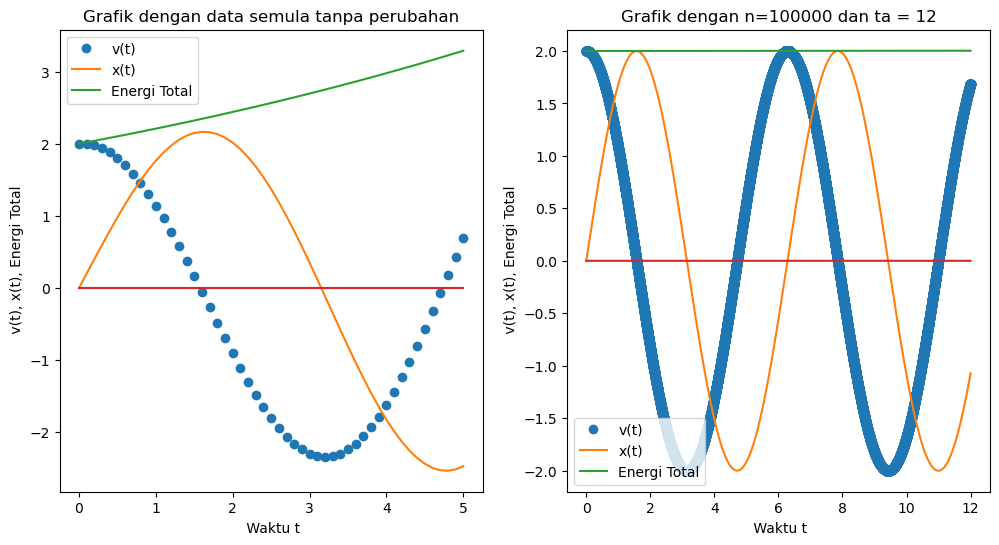

In [16]:
title = "Grafik dengan n=100000 dan ta = 12"
plot_grafik(df,df_h,title)

Jika besar h dirubah maka energi total menjadi ajeg

# Jawab No.3

3. Tunjukkan dari hasil data atau grafik yang anda peroleh bahwa periode gerak
osilasi cocok dengan rumus yang diperoleh secara analitik yaitu:
\begin{eqnarray}
  T=2\pi\sqrt{\frac{m}{k}}.
  \tag{6}
\end{eqnarray}

In [17]:
n = 100_000
t0 = 0
ta = 10
x0 = 0
v0 = 2
m = 1
k = 1

In [18]:
T = 2*np.pi*np.sqrt(m/k)
print(f"{T} sekon")

6.283185307179586 sekon


In [19]:
df = metode_euler(n,t0,ta,v0,x0,k,m)
df

,ti,xi,vi,En_total
0,0.0000,0.000000,2.000000,2.000000
1,0.0001,0.000200,2.000000,2.000000
2,0.0002,0.000400,2.000000,2.000000
3,0.0003,0.000600,2.000000,2.000000
4,0.0004,0.000800,2.000000,2.000000
...,...,...,...,...
99996,9.9996,-1.087915,-1.679418,2.002001
99997,9.9997,-1.088083,-1.679309,2.002001
99998,9.9998,-1.088250,-1.679200,2.002001
99999,9.9999,-1.088418,-1.679091,2.002001


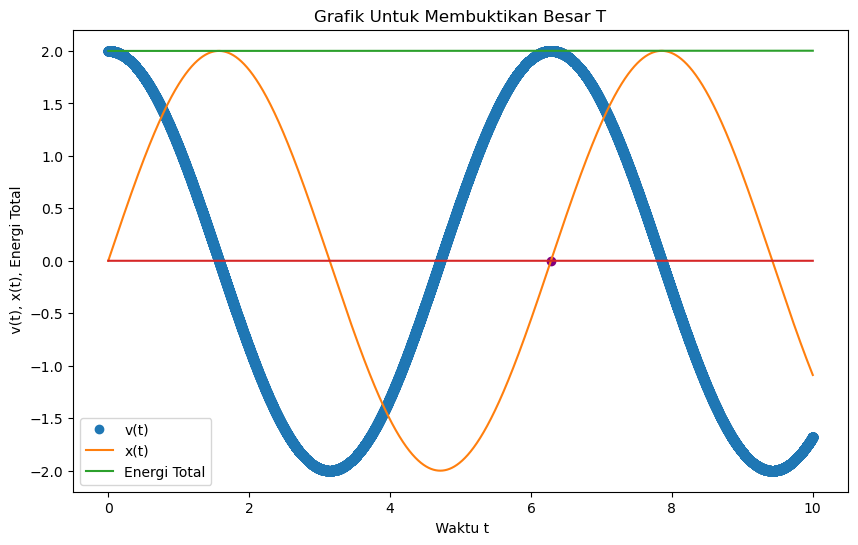

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df["ti"],df["vi"],'o')
ax.plot(df["ti"],df["xi"],'-')
ax.plot(df["ti"],df["En_total"])
ax.plot(df["ti"],np.zeros(len(df["ti"])))
ax.scatter(T,0, label = "T", color = "purple")
ax.set_title("Grafik Untuk Membuktikan Besar T")
ax.set_xlabel(" Waktu t")
ax.set_ylabel(" v(t), x(t), Energi Total")
ax.legend(["v(t)","x(t)","Energi Total"],loc='best');

Dapat dilihat pada grafik ada titik scatter di saat waktu menunjukkan angka $6.283185307179586$ sekon dan itu dapat membuktikan persamaan $T = 2\pi\sqrt{\frac{m}{k}}$ benar karena titik tersebut berada pada saat terjadi pas 1 gelmobang